In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('../Images/Nadia_Murad.jpg', 0)
denis = cv2.imread('../Images/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('../Images/solvay_conference.jpg', 0)

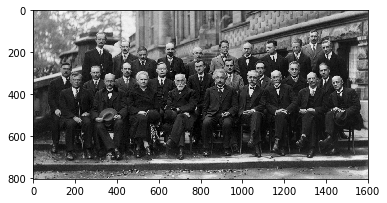

In [3]:
plt.imshow(solvay, cmap='gray')

In [4]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

In [5]:
def detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img)
    
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255, 255), 10)
        
    return face_img

In [6]:
result = detect_face(solvay)

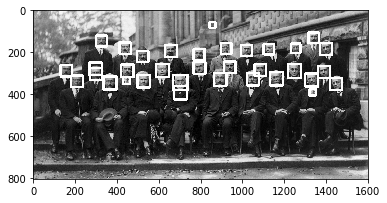

In [7]:
plt.imshow(result, cmap='gray')

In [8]:
def adj_detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x, y, w, h) in face_rect:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255, 255, 255, 255), 10)
        
    return face_img

In [9]:
result = adj_detect_face(solvay)

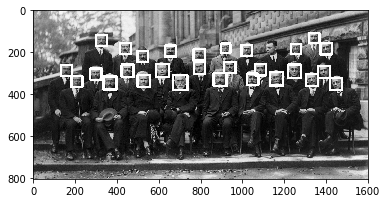

In [10]:
plt.imshow(result, cmap='gray')

In [11]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')

In [12]:
def detect_eye(img):
    face_img = img.copy()
    
    eyes_rect = eye_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x, y, w, h) in eyes_rect:
        cv2.rectangle(face_img, (x, y), (x+w, y+h), (255,255,255,255), 10)
        
    return face_img

In [13]:
result = detect_eye(nadia)

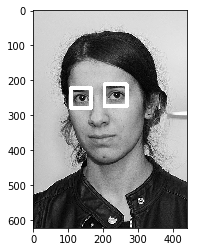

In [14]:
plt.imshow(result, cmap='gray')

In [15]:
result = detect_eye(denis)

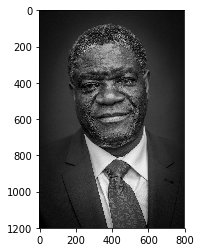

In [16]:
plt.imshow(result, cmap='gray')

In [20]:
cap = cv2.VideoCapture(0)

In [21]:
while True:
    
    ret, frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video Frame', frame)
    
    k = cv2.waitKey(1)
    if k ==27:
        break
        
cap.release()
cv2.destroyAllWindows()